In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Converting a python dictionary into dataframe**

In [3]:
df = {
    'Name':['Sumukha','Fatro','Thilak'],
    'Age':[20,21,19],
    'State':['Hyderabad',None,'Coimbatore']
}

# df=pd.read_csv('sample.csv')
df = pd.DataFrame(df)

**Printing a dataframe**

In [4]:
df

,Name,Age,State
0,Sumukha,20,Hyderabad
1,Fatro,21,None
2,Thilak,19,Coimbatore


**Printing top n rows, here n=2**

In [5]:
df.head(2)

,Name,Age,State
0,Sumukha,20,Hyderabad
1,Fatro,21,None


**Printing bottom n rows, here n=1**

In [6]:
df.tail(1)

,Name,Age,State
2,Thilak,19,Coimbatore


**Printing no. of rows and no. of cols**

In [7]:
df.shape

(3, 3)

**Knowing the meta data of dataframe**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    3 non-null      object
 1   Age     3 non-null      int64 
 2   State   2 non-null      object
dtypes: int64(1), object(2)
memory usage: 200.0+ bytes


**Checking whether each value is null or not**

In [9]:
x = df.isnull()
x

,Name,Age,State
0,False,False,False
1,False,False,True
2,False,False,False


**Filling null values of a particular feature/ column**

In [10]:
df['State'].fillna('State', inplace=True)
df

,Name,Age,State
0,Sumukha,20,Hyderabad
1,Fatro,21,State
2,Thilak,19,Coimbatore


**Printing the statistical information of each feature with numerical values**

In [11]:
df.describe()

,Age
count,3.0
mean,20.0
std,1.0
min,19.0
25%,19.5
50%,20.0
75%,20.5
max,21.0


**Inserting a new column and appending values to the dataframe**

In [12]:
df['Marks']= [99,88,80]
df

,Name,Age,State,Marks
0,Sumukha,20,Hyderabad,99
1,Fatro,21,State,88
2,Thilak,19,Coimbatore,80


**Deleting/ dropping a column from a dataframe**

In [13]:
df.drop(['Marks'], axis=1, inplace=True)

**Printing nth row of the dataframe**

In [14]:
df.loc[1]

Name     Fatro
Age         21
State    State
Name: 1, dtype: object

In [15]:
df.isnull()

,Name,Age,State
0,False,False,False
1,False,False,False
2,False,False,False


**Importing Titanic Dataset!**

In [16]:
data = pd.read_csv(r"C:\Users\Msc 1\Desktop\Sumu\MDSC-106 P\titanic_dataset.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**Creating a copy of the dataframe to deal with it**

In [17]:
df = data.copy()

**Plotting a bar plot to display no. of survivors of each class (classified by Sex)**

<Axes: xlabel='Pclass', ylabel='Survived'>

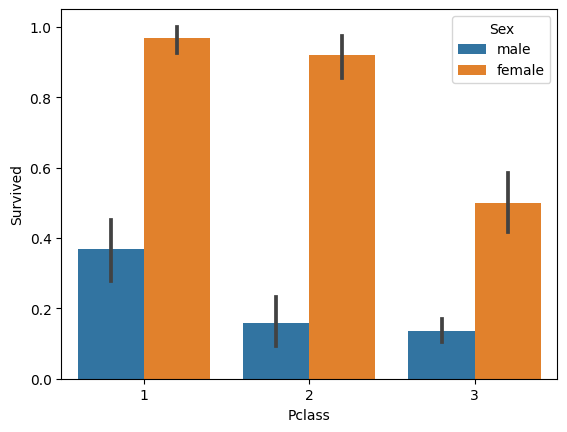

In [18]:
sns.barplot(x=df['Pclass'],y=df['Survived'],hue=df['Sex'])

**Plotting a scatterplot to show the ticket fare range for different age groups (classified by class)**

<Axes: xlabel='Age', ylabel='Fare'>

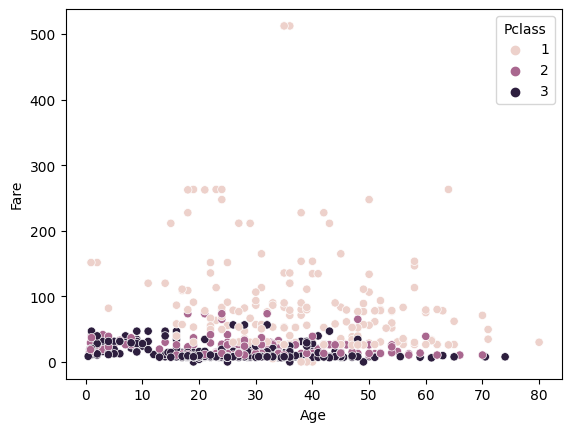

In [19]:
sns.scatterplot(x=df['Age'],y=df['Fare'],hue=df['Pclass'])

**Plotting a histogram to see the no. of people across each age range**

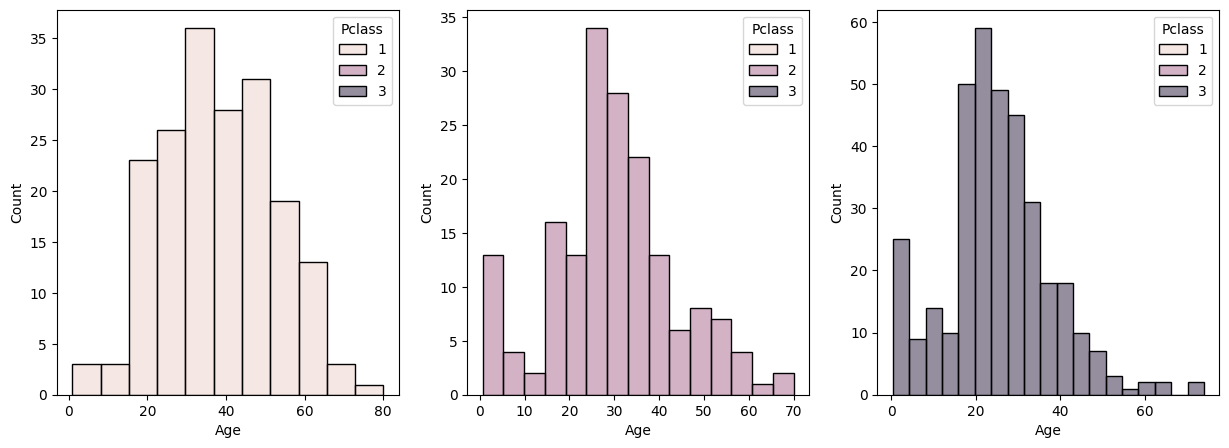

In [20]:
plt.figure(figsize=(15,5))
for y in range(1,4):
    plt.subplot(1,3,y)
    sns.histplot(x=df[df['Pclass']==y]['Age'], hue=df['Pclass'])

**Plotting a boxplot to look at the spread of the age of passengers in each class**

<Axes: xlabel='Pclass', ylabel='Age'>

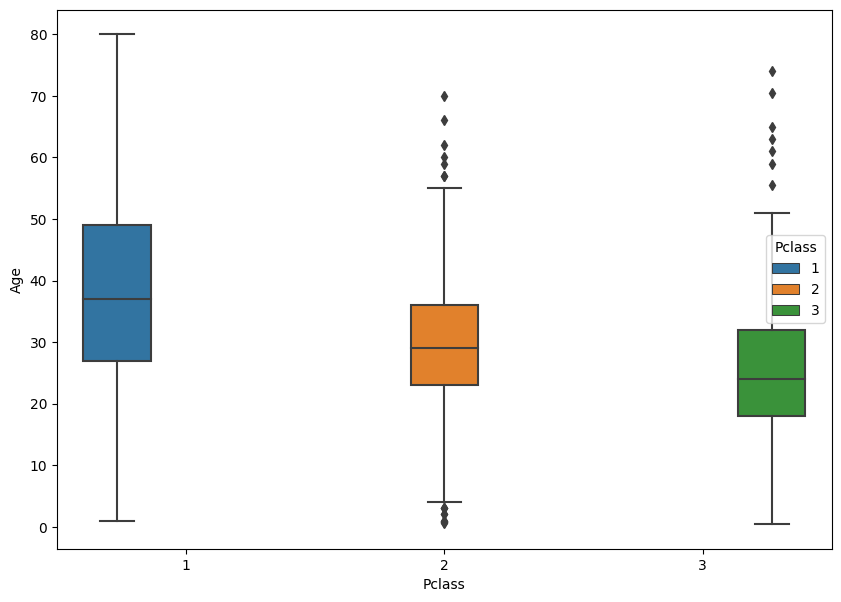

In [27]:
plt.figure(figsize=(10,7))
sns.boxplot(x=df['Pclass'],y=df['Age'],hue=df['Pclass'])

**Plotting a stacked bar plot**

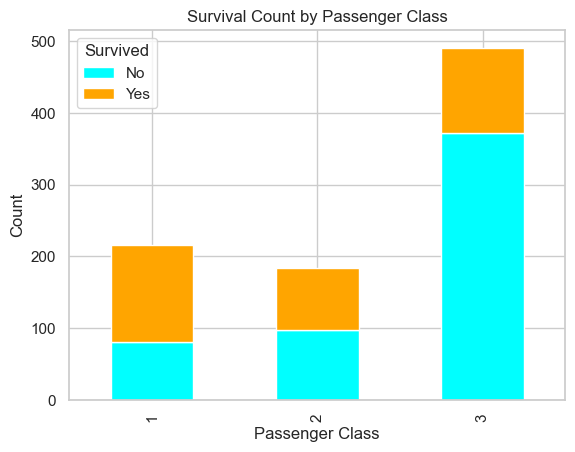

In [33]:
pivot_table = df.pivot_table(index='Pclass', columns='Survived', values='PassengerId', aggfunc='count')

# Plotting
sns.set(style="whitegrid")
pivot_table.plot(kind='bar', stacked=True, color=['cyan', 'orange'])
plt.title("Survival Count by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()